# Prepare rules for the all the data sets 
# 1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
# 2) Change the minimum length in apriori algorithm
# 3) Visulize the obtained rules using different plots 


#

### Book

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import association_rules,apriori
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df=pd.read_csv('book.csv')

In [3]:
df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


### min_support=0.25 & min_threshold=0.5

In [5]:
freq_pattern=apriori(df,min_support=0.25,max_len=2,use_colnames=True)

C:\Users\Hp\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [6]:
freq_pattern

,support,itemsets
0,0.423,(ChildBks)
1,0.431,(CookBks)
2,0.282,(DoItYBks)
3,0.276,(GeogBks)
4,0.256,"(CookBks, ChildBks)"


In [7]:
rules_final=association_rules(freq_pattern,metric='confidence', min_threshold=0.5)
rules_final

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856


In [8]:
support = rules_final["support"]
confidence =  rules_final["confidence"]
lift = rules_final["lift"]

Text(0.5, 0, 'lift')

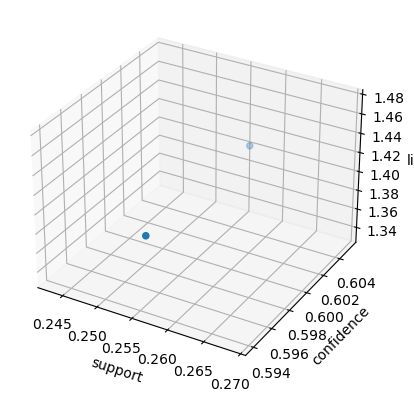

In [9]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

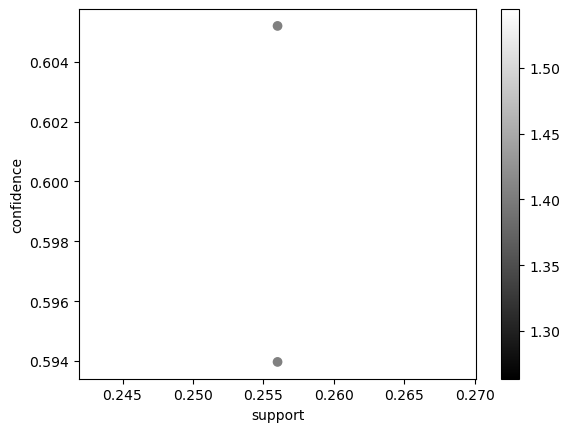

In [10]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")

### min_support=0.1 & min_threshold=0.4

In [11]:
freq_pattern=apriori(df,min_support=0.1,max_len=2,use_colnames=True)

C:\Users\Hp\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [12]:
freq_pattern

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [13]:
rules_final=association_rules(freq_pattern,metric='confidence', min_threshold=0.4)
rules_final

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
5,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
6,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427,0.490986
7,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074,0.554271
8,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211,0.695481
9,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858


In [14]:
support = rules_final["support"]
confidence =  rules_final["confidence"]
lift = rules_final["lift"]

Text(0.5, 0, 'lift')

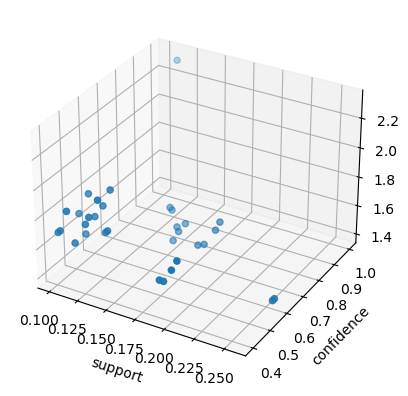

In [15]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

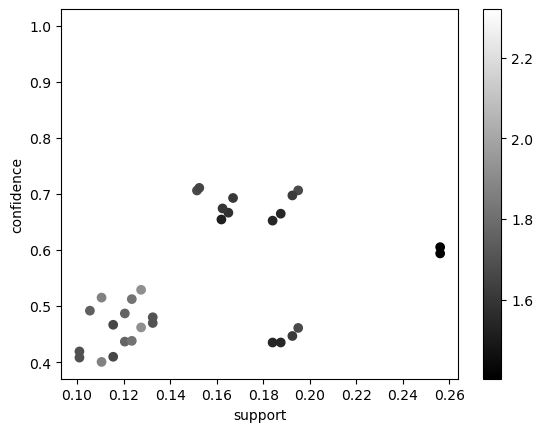

In [16]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")

#

### My Movies

In [17]:
df=pd.read_csv('my_movies.csv')

In [18]:
df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [19]:
df.fillna(0,inplace=True)

In [20]:
df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,0,0,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,0,0,0,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,0,0,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,0,0,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,0,0,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,0,0,0,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,0,0,0,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,0,0,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,0,1,1,0,0,0,0,0,1,0,1


In [21]:
df=pd.get_dummies(df)
df

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_Patriot,V3_0,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_0,V4_Green Mile,V5_0,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1
1,0,1,0,0,1,0,0,0,1,0,...,1,0,1,0,0,0,1,0,1,0
2,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,1,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,1,0,1,0
4,1,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,1,0,1,0
5,1,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,1,0,1,0
6,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
7,0,1,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,1,0,1,0
8,1,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,1,0,1,0
9,1,1,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,1,1,0


### min_support=0.5 & min_threshold=0.7

In [22]:
freq_pattern=apriori(df,min_support=0.5,max_len=3,use_colnames=True)
freq_pattern

C:\Users\Hp\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
5,0.8,(V4_0)
6,0.9,(V5_0)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.5,"(V5_0, Sixth Sense)"
9,0.6,"(Gladiator, Patriot)"


In [23]:
rules_final=association_rules(freq_pattern,metric='confidence',min_threshold=0.7)
rules_final

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(Sixth Sense),(V5_0),0.6,0.9,0.5,0.833333,0.925926,-0.04,0.6,-0.166667
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
...,...,...,...,...,...,...,...,...,...,...
140,"(V5_0, V4_0)",(V2_Patriot),0.8,0.6,0.6,0.750000,1.250000,0.12,1.6,1.000000
141,"(V5_0, V2_Patriot)",(V4_0),0.6,0.8,0.6,1.000000,1.250000,0.12,inf,0.500000
142,"(V4_0, V2_Patriot)",(V5_0),0.6,0.9,0.6,1.000000,1.111111,0.06,inf,0.250000
143,(V4_0),"(V5_0, V2_Patriot)",0.8,0.6,0.6,0.750000,1.250000,0.12,1.6,1.000000


In [24]:
support = rules_final["support"]
confidence =  rules_final["confidence"]
lift = rules_final["lift"]

Text(0.5, 0, 'lift')

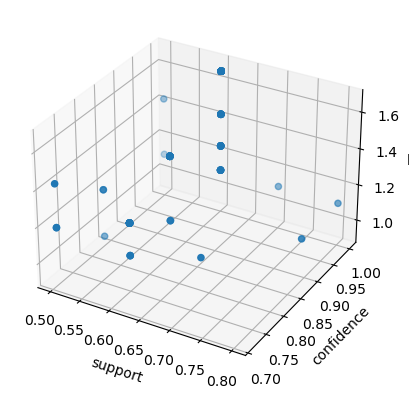

In [25]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

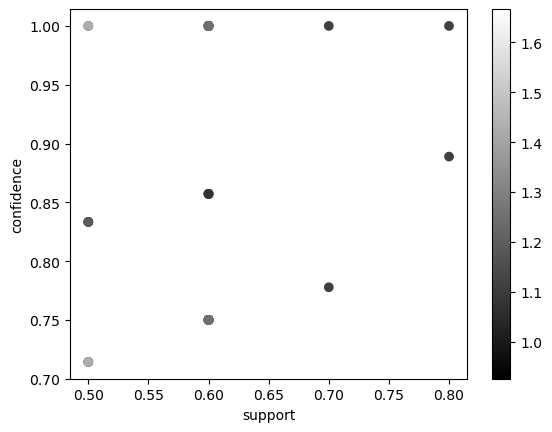

In [26]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")

### min_support=0.6 & min_threshold=0.6

In [27]:
freq_pattern=apriori(df,min_support=0.6,max_len=3,use_colnames=True)
freq_pattern

C:\Users\Hp\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
5,0.8,(V4_0)
6,0.9,(V5_0)
7,0.6,"(Gladiator, Patriot)"
8,0.6,"(Gladiator, V1_Gladiator)"
9,0.6,"(Gladiator, V2_Patriot)"


In [28]:
rules_final=association_rules(freq_pattern,metric='confidence',min_threshold=0.6)
rules_final

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.00
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.75
2,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.00
3,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.75
4,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.00
...,...,...,...,...,...,...,...,...,...,...
145,"(V5_0, V2_Patriot)",(V4_0),0.6,0.8,0.6,1.000000,1.250000,0.12,inf,0.50
146,"(V4_0, V2_Patriot)",(V5_0),0.6,0.9,0.6,1.000000,1.111111,0.06,inf,0.25
147,(V5_0),"(V4_0, V2_Patriot)",0.9,0.6,0.6,0.666667,1.111111,0.06,1.2,1.00
148,(V4_0),"(V5_0, V2_Patriot)",0.8,0.6,0.6,0.750000,1.250000,0.12,1.6,1.00


In [29]:
support = rules_final["support"]
confidence =  rules_final["confidence"]
lift = rules_final["lift"]

Text(0.5, 0, 'lift')

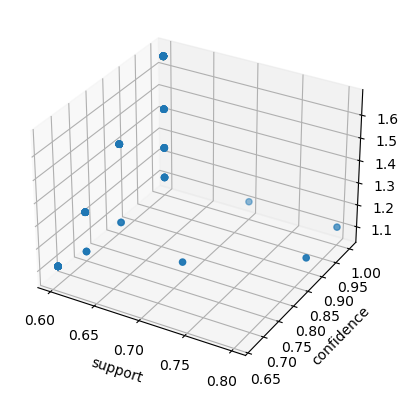

In [30]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

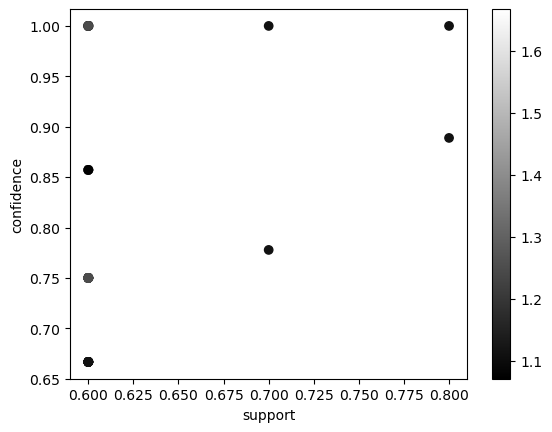

In [31]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")